In [7]:
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
file_path_FinancialIndicator = "/content/drive/MyDrive/Dataset/Simplize_FPT_FinancialIndicator_20250315.xlsx"
file_path_PriceHistory = "/content/drive/MyDrive/Dataset/FPT_PriceHistory_after_fill.xlsx"

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Đọc dữ liệu (Read data)
data_FinancialIdicatior = pd.read_excel(file_path_FinancialIndicator)
data_PriceHistory = pd.read_excel(file_path_PriceHistory)

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [15]:
# Xóa những cột không liên quan (Remove irrelevant columns)
threshold = data_FinancialIdicatior.shape[1]*0.7
data_FinancialIdicatior_cleaned = data_FinancialIdicatior.dropna(thresh = threshold)
data_FinancialIdicatior_cleaned = data_FinancialIdicatior_cleaned.reset_index(drop = True)

In [16]:
import numpy as np
all_data = []
for i in range(1, 55):
    row = data_FinancialIdicatior_cleaned.iloc[i, 1:]  # Lấy dữ liệu số từ cột 2 trở đi
    # Tính Five-Number Summary và độ lệch chuẩn, phương sai
    five_number_summary = row.quantile([0, 0.25, 0.5, 0.75, 1])
    std_dev = np.std(data_FinancialIdicatior_cleaned.iloc[i, 1:], ddof=1)
    variance = np.var(data_FinancialIdicatior_cleaned.iloc[i, 1:], ddof=1)
    # Gộp kết quả
    all_data.append({
        "Name" : data_FinancialIdicatior_cleaned.iloc[i, 0],
        "Min": f"{float(five_number_summary[0.00]):.2f}",
        "Q1" : f"{float(five_number_summary[0.25]):.2f}",
        "Median" : f"{float(five_number_summary[0.50]):.2f}",
        "Q3" : f"{float(five_number_summary[0.75]):.2f}",
        "Max" : f"{float(five_number_summary[1.00]):.2f}",
        "StdDev": f"{std_dev:.2f}",
        "Variance": f"{variance:.2f}"
    })
df = pd.DataFrame(all_data, columns=["Name", "Min", "Q1", "Median", "Q3", "Max","StdDev","Variance"])
df.to_excel("descriptive_statistics_FinancialIdicatior.xlsx", index=False)


In [17]:
df

,Name,Min,Q1,Median,Q3,Max,StdDev,Variance
0,Doanh thu thuần,4750768611617.00,7578027878483.50,9472791537098.50,11860927434919.75,17607817805892.00,3052925506726.66,9320354149622225588715520.00
1,Tăng trưởng doanh thu,-0.50,0.00,0.15,0.20,0.28,0.22,0.05
2,Lợi nhuận gộp,1686151346915.00,2263642986958.25,2818774794354.00,4160647554568.50,6478973351926.00,1378233073278.83,1899526404279617846247424.00
3,Tăng trưởng lợi nhuận gộp,-0.18,0.08,0.16,0.23,0.37,0.12,0.01
4,Lợi nhuận thuần từ HĐKD,554781334345.00,870537065960.50,1307722591068.00,1936162867345.00,2948226004570.00,687596187417.42,472788516950978120908800.00
5,Tăng trưởng lợi nhuận thuần,-0.43,0.13,0.20,0.22,0.95,0.18,0.03
6,Lợi nhuận trước thuế,562745635943.00,881980084821.75,1326982067937.00,1952403318687.75,2959667491092.00,689506581391.46,475419325782139321974784.00
7,Tăng trưởng lợi nhuận trước thuế,-0.43,0.13,0.19,0.22,0.94,0.18,0.03
8,Lợi nhuận sau thuế của Cổ đông công ty mẹ,345690044903.00,591371922512.00,892426599347.00,1368612191976.75,2088852212408.00,503232659898.67,253243109988689852235776.00
9,Tăng trưởng lợi nhuận sau thuế,-0.45,0.12,0.20,0.25,1.15,0.22,0.05


In [18]:
# Xóa những cột không liên quan (Remove irrelevant columns)
threshold = data_PriceHistory.shape[1]*0.7
data_PriceHistory_cleaned = data_PriceHistory.dropna(thresh = threshold)
data_PriceHistory_cleaned = data_PriceHistory_cleaned.reset_index(drop = True)

In [19]:
data_PriceHistory_cleaned

,NGÀY,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
0,14/03/2025,135600.000000,136300.000000,130800.000000,131400.000000,-5100.0,-0.037363,16094000
1,13/03/2025,136100.000000,138000.000000,136100.000000,136500.000000,600.0,0.004415,3610200
2,12/03/2025,137700.000000,138700.000000,135900.000000,135900.000000,-1600.0,-0.011636,6185000
3,11/03/2025,138000.000000,138500.000000,137000.000000,137500.000000,-1800.0,-0.012922,5784400
4,10/03/2025,141500.000000,141500.000000,139200.000000,139300.000000,-2100.0,-0.014851,5323000
...,...,...,...,...,...,...,...,...
995,19/03/2021,40523.598023,40776.870510,40219.671037,40422.289028,-1200.0,-0.014800,2923500
996,18/03/2021,41030.142998,41030.142998,40523.598023,41030.142998,200.0,0.002500,2177500
997,17/03/2021,41283.415486,41283.415486,40523.598023,40928.834003,-700.0,-0.008600,2573500
998,16/03/2021,39003.963097,41283.415486,38801.345107,41030.142998,4500.0,0.058800,5171000


In [38]:
all_data = []
for i in range(1, 8):
    row = data_PriceHistory_cleaned.iloc[:, i]  # Lấy dữ liệu từ cột thứ i (bỏ qua cột 0 là tên)

    five_number_summary = row.quantile([0, 0.25, 0.5, 0.75, 1])
    std_dev = np.std(row, ddof=1)
    variance = np.var(row, ddof=1)

    all_data.append({
        "Name": data_PriceHistory_cleaned.columns[i],  # Lấy tên cột thay vì hàng i
        "Min": f"{five_number_summary.iloc[0]:.2f}",
        "Q1": f"{five_number_summary.iloc[1]:.2f}",
        "Median": f"{five_number_summary.iloc[2]:.2f}",
        "Q3": f"{five_number_summary.iloc[3]:.2f}",
        "Max": f"{five_number_summary.iloc[4]:.2f}",
        "StdDev": f"{std_dev:.2f}",
        "Variance": f"{variance:.2f}"
    })

df = pd.DataFrame(all_data)
df.to_excel("descriptive_statistics_PriceHistory.xlsx", index=False)

In [39]:
df

,Name,Min,Q1,Median,Q3,Max,StdDev,Variance
0,GIÁ MỞ CỬA,38598.73,56505.94,62018.48,95262.88,154100.00,32047.26,1027026915.38
1,GIÁ CAO NHẤT,38902.65,57100.74,62630.32,97021.05,156000.00,32291.24,1042724204.36
2,GIÁ THẤP NHẤT,37737.60,55810.90,61544.00,94340.91,153400.00,31803.23,1011445351.66
3,GIÁ ĐÓNG CỬA,38548.07,56368.36,62028.03,95584.50,154300.00,32045.58,1026919022.51
4,THAY ĐỔI GIÁ,-10800.00,-600.00,0.00,900.00,7800.00,1714.17,2938366.52
5,% THAY ĐỔI,-0.11,-0.01,0.00,0.01,0.07,0.02,0.00
6,KHỐI LƯỢNG,221000.00,1538375.00,2553581.00,3851300.00,16094000.00,2184421.12,4771695639296.23


In [40]:
df.dtypes

,0
Name,object
Min,object
Q1,object
Median,object
Q3,object
Max,object
StdDev,object
Variance,object


In [41]:
# Chuyển đổi các cột về kiểu số (float)
cols = ['Min', 'Q1', 'Median', 'Q3', 'Max', 'StdDev', 'Variance']
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")


Detect outliers

In [42]:
df["IQR"] = df["Q3"] - df["Q1"]

df["Lower Bound"] = df["Q1"] - 1.5 * df["IQR"]
df["Upper Bound"] = df["Q3"] + 1.5 * df["IQR"]

df[["Name", "Lower Bound", "Upper Bound"]]

,Name,Lower Bound,Upper Bound
0,GIÁ MỞ CỬA,-1629.470,153398.290
1,GIÁ CAO NHẤT,-2779.725,156901.515
2,GIÁ THẤP NHẤT,-1984.115,152135.925
3,GIÁ ĐÓNG CỬA,-2455.850,154408.710
4,THAY ĐỔI GIÁ,-2850.000,3150.000
5,% THAY ĐỔI,-0.040,0.040
6,KHỐI LƯỢNG,-1931012.500,7320687.500


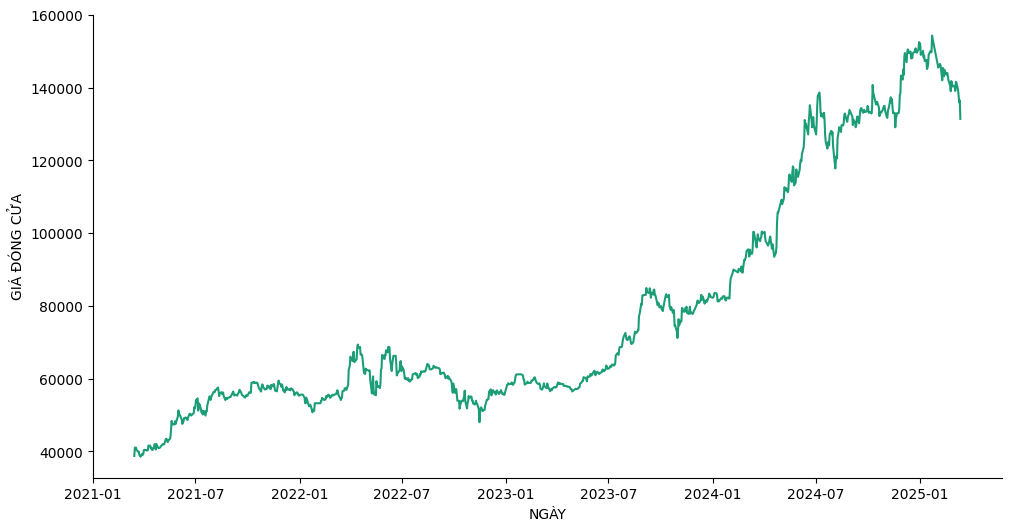

In [27]:
# @title NGÀY vs GIÁ ĐÓNG CỬA

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NGÀY']
  ys = series['GIÁ ĐÓNG CỬA']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('NGÀY', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NGÀY')
_ = plt.ylabel('GIÁ ĐÓNG CỬA')

In [23]:
data_PriceHistory_cleaned['NGÀY']= pd.to_datetime(data_PriceHistory_cleaned['NGÀY'], dayfirst=True)
df = data_PriceHistory_cleaned[['NGÀY','GIÁ ĐÓNG CỬA']]

Text(0, 0.5, 'Tần suất')

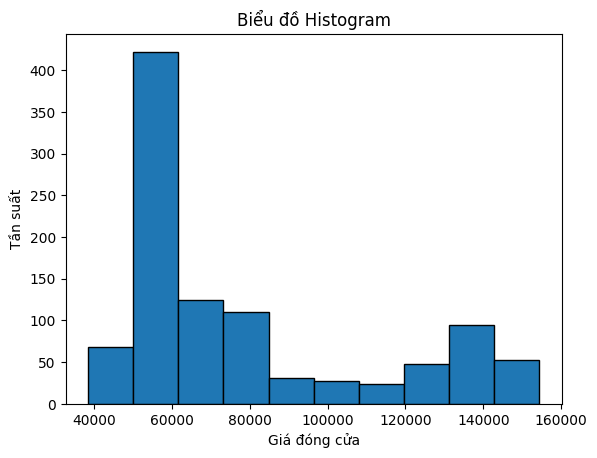

In [28]:
plt.hist(df['GIÁ ĐÓNG CỬA'], bins = 10, edgecolor='black')
plt.title('Biểu đồ Histogram')
plt.xlabel('Giá đóng cửa')
plt.ylabel('Tần suất')

Nhận xét: Vì biểu đồ histogram có đuôi kéo dài về bên phải nên dữ liệu lệch phải. Dữ liệu tập trung nhiều nhất trong khoảng 50000 đến 60000, với tần suất lớn hơn 400.

Text(0, 0.5, 'Giá đóng cửa')

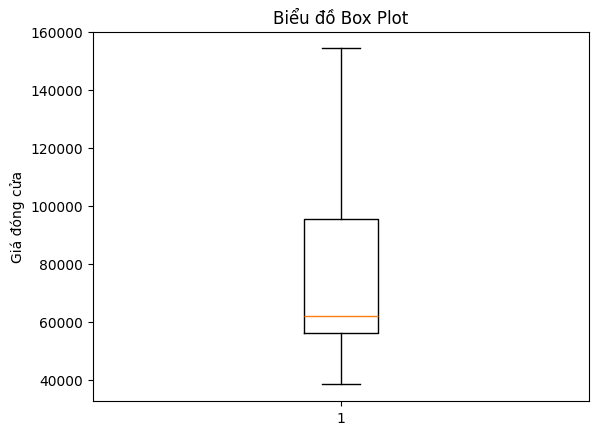

In [29]:
plt.boxplot(df['GIÁ ĐÓNG CỬA'])
plt.title('Biểu đồ Box Plot')
plt.ylabel('Giá đóng cửa')

Nhận xét:
- Giá trị nhỏ nhất của dữ liệu khoảng 40000, giá trị trung vị khoảng 60000, trong khi đó giá trị lớn nhất bằng 155000, cho thấy rằng phạm vi biến động của giá trị cổ phiếu khá lớn.
- Không có giá trị ngoại lai trên biểu đồ.